<a href="https://colab.research.google.com/github/KIMARIYOGESH/PYTHON-PROJECTS/blob/main/Monopulse_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

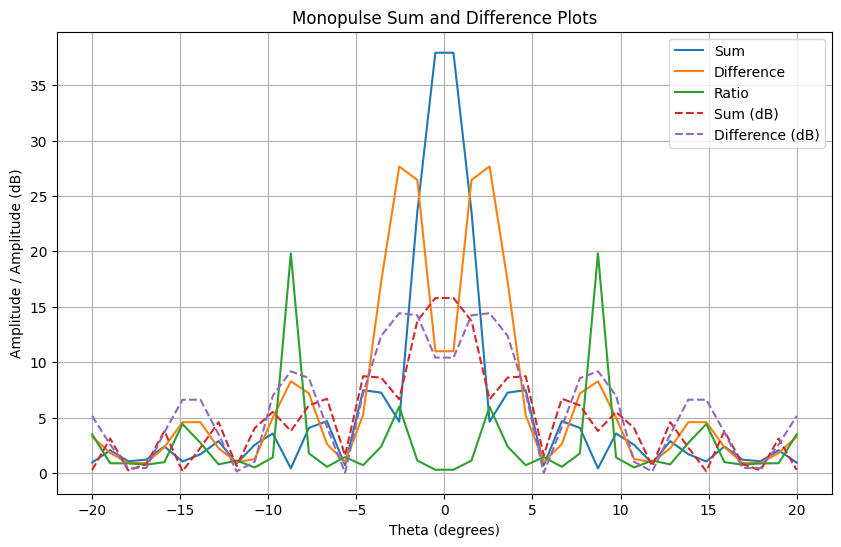

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

c = 3.0e8  # Speed of light in meters per second
f = 3.0e8  # Frequency in Hz
theta_s = 0  # Reference angle in degrees
theta_deg = np.linspace(-20, 20, 40)  # Range of theta values in degrees
theta_rad = np.deg2rad(theta_deg)  # Convert theta to radians
N = 40  # Number of antenna elements

Do = c / (2 * f)  # Half-wavelength distance

# Calculate Dn for Sum
Dn = np.zeros(N)
if N % 2 == 0:
    Dn = 2 * np.pi * Do * (np.arange(1, N + 1) - (N / 2) - 0.5)

# Calculate Dn for Difference
Dn1 = np.zeros(int(N/2))
Dn2 = np.zeros(int(N/2))
if N % 2 == 0:
    Dn1 = 2 * np.pi * Do * (np.arange(1, (int(N/2)+1)) - (N / 2) - 0.5)
    Dn2 = 2 * np.pi * Do * (np.arange(int(N/2), N+1) - (N / 2) - 0.5)

y = np.sin(np.deg2rad(theta_s)) - np.sin(theta_rad)

# Calculate the summation for varying theta values (Sum and Difference)
result_sum = np.zeros(len(theta_rad), dtype=np.complex128)
result_diff = np.zeros(len(theta_rad), dtype=np.complex128)

for i, angle in enumerate(theta_rad):
    result_sum[i] = np.sum(np.exp(-1j * Dn * y[i]))
    result_diff[i] = np.sum(np.exp(-1j * Dn2 * y[i])) - np.sum(np.exp(-1j * Dn1 * y[i]))

# Convert result_diff and result_sum to dB for better comparison
result_sum_db = 10 * np.log10(np.abs(result_sum))
result_diff_db = 10 * np.log10(np.abs(result_diff))

# Calculate ratio of Difference to Sum
ratio = result_diff / result_sum
ratio_db = 10 * np.log10(np.abs(ratio))

# Plotting
plt.figure(figsize=(10, 6))

# Plot Sum and Difference results
plt.plot(theta_deg, np.abs(result_sum), label='Sum')
plt.plot(theta_deg, np.abs(result_diff), label='Difference')
plt.plot(theta_deg, np.abs(ratio), label='Ratio')

# Plot Sum and Difference results in dB for better visualization
plt.plot(theta_deg, np.abs(result_sum_db), linestyle='--', label='Sum (dB)')
plt.plot(theta_deg, np.abs(result_diff_db), linestyle='--', label='Difference (dB)')

# Set plot labels, title, legend, and grid
plt.title('Monopulse Sum and Difference Plots')
plt.xlabel('Theta (degrees)')
plt.ylabel('Amplitude / Amplitude (dB)')
plt.legend()
plt.grid(True)

plt.show()


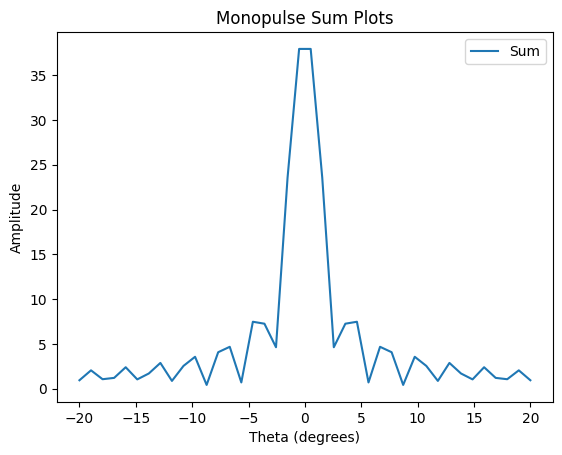

In [ ]:
plt.plot(theta_deg, np.abs(result_sum), label='Sum')
plt.title('Monopulse Sum Plots')
plt.xlabel('Theta (degrees)')
plt.ylabel('Amplitude')
plt.legend()

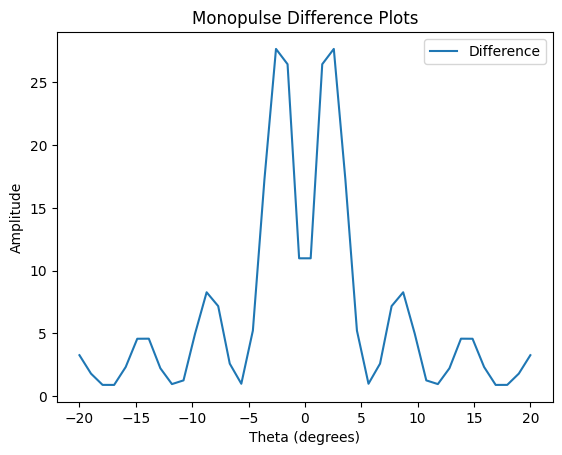

In [ ]:
plt.plot(theta_deg, np.abs(result_diff), label='Difference')
plt.title('Monopulse Difference Plots')
plt.xlabel('Theta (degrees)')
plt.ylabel('Amplitude')
plt.legend()

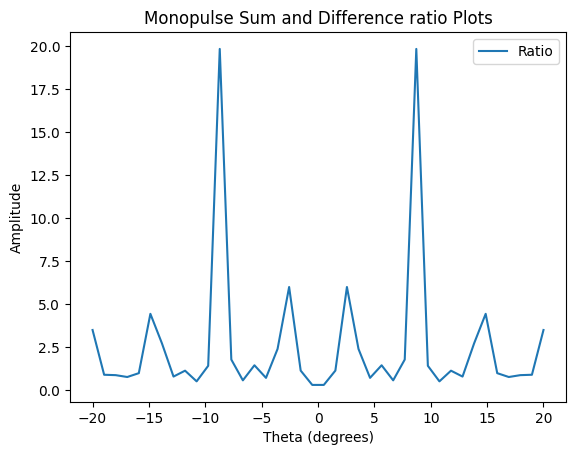

In [ ]:












plt.plot(theta_deg, np.abs(ratio), label='Ratio')
plt.title('Monopulse Sum and Difference ratio Plots')
plt.xlabel('Theta (degrees)')
plt.ylabel('Amplitude')
plt.legend()

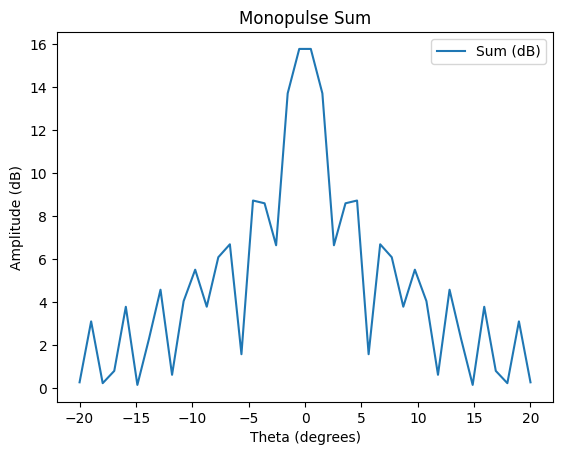

In [ ]:
plt.plot(theta_deg, np.abs(result_sum_db), linestyle='-', label='Sum (dB)')
plt.title('Monopulse Sum')
plt.xlabel('Theta (degrees)')
plt.ylabel('Amplitude (dB)')
plt.legend()


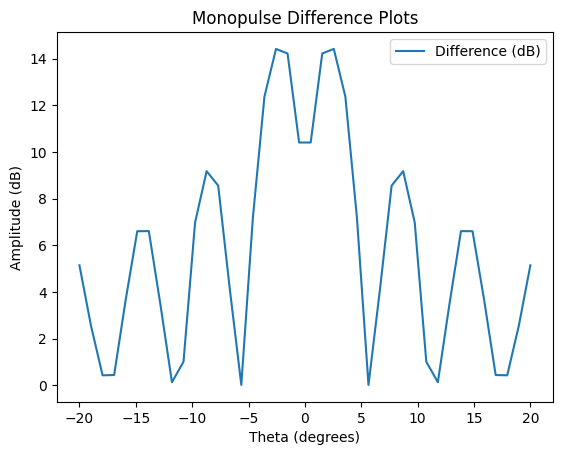

In [ ]:
plt.plot(theta_deg, np.abs(result_diff_db), linestyle='-', label='Difference (dB)')
plt.title('Monopulse Difference Plots')
plt.xlabel('Theta (degrees)')
plt.ylabel('Amplitude (dB)')
plt.legend()